In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
dataPath = '../Data/saxpyData/'
no_shared1 = pd.read_csv(dataPath+'saxpyNoShared1.csv')
shared1 = pd.read_csv(dataPath+'saxpyShared1.csv')

no_shared1.columns = ['start', 'end']
shared1.columns = ['start', 'end']

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
# Get the interval between the start time and the previous stop time
no_shared_ivls = []
shared_ivls = []
for i in range(0, len(shared1)-1):
  no_shared_ivls.append(no_shared1['end'][i+1] - no_shared1['start'][i])
  shared_ivls.append(shared1['end'][i+1] - shared1['start'][i])


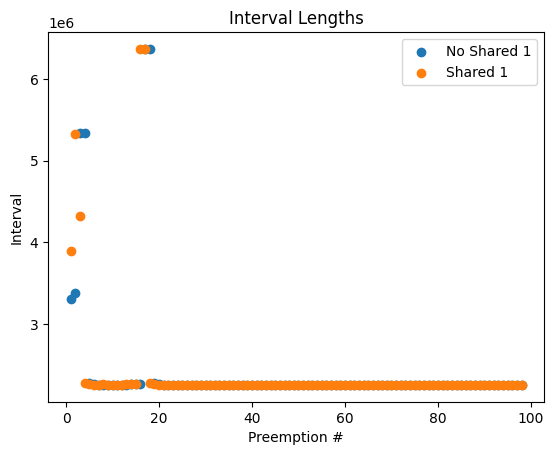

In [10]:
# scatterplot of spaced intervals
NUM_SAMPLES = 100

# Create a scatter plot
plt.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls, label='No Shared 1')
plt.scatter(range(1, NUM_SAMPLES-1), shared_ivls, label='Shared 1')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval')
plt.title('Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
#plt.ylim(1.01*1e6, 1.03*1e6)

# Show the plot
plt.show()

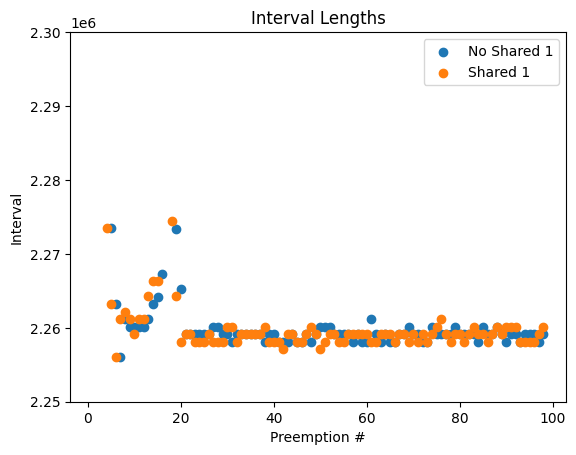

In [17]:
# scatterplot of spaced intervals
NUM_SAMPLES = 100

# Create a scatter plot
plt.scatter(range(1, NUM_SAMPLES-1), no_shared_ivls, label='No Shared 1')
plt.scatter(range(1, NUM_SAMPLES-1), shared_ivls, label='Shared 1')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval')
plt.title('Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
plt.ylim(2.25*1e6, 2.3*1e6)

# Show the plot
plt.show()

In [18]:
# Print the 5-number summaries
import numpy as np
sum_no_shared_ivls = np.percentile(no_shared_ivls, [0, 25, 50, 75, 100], method='midpoint')
print('No Shared Memory:\n-----------------')
print("Minimum:", sum_no_shared_ivls[0])
print("Q1:", sum_no_shared_ivls[1])
print("Median:", sum_no_shared_ivls[2])
print("Q3:", sum_no_shared_ivls[3])
print("Maximum:", sum_no_shared_ivls[4])
print('-----------------\n')

print('Shared Memory:\n-----------------')
sum_shared_ivls = np.percentile(shared_ivls, [0, 25, 50, 75, 100], method='midpoint')
print("Minimum:", sum_shared_ivls[0])
print("Q1:", sum_shared_ivls[1])
print("Median:", sum_shared_ivls[2])
print("Q3:", sum_shared_ivls[3])
print("Maximum:", sum_shared_ivls[4])
print('-----------------')

No Shared Memory:
-----------------
Minimum: 2256024.0
Q1: 2259096.0
Median: 2259097.0
Q3: 2260121.0
Maximum: 6367662.0
-----------------

Shared Memory:
-----------------
Minimum: 2256042.0
Q1: 2258091.0
Median: 2259115.0
Q3: 2260139.0
Maximum: 6366690.0
-----------------


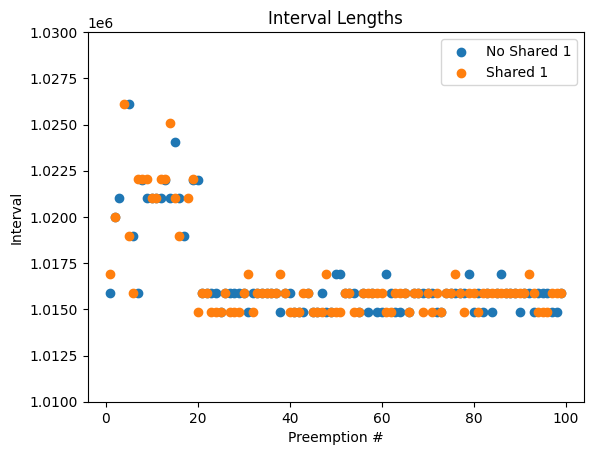

In [13]:


no_shared1['interval'] = no_shared1['end'] - no_shared1['start']
shared1['interval'] = shared1['end'] - shared1['start']

no_shared2 = pd.read_csv(dataPath+'saxpyNoShared2.csv')
shared2 = pd.read_csv(dataPath+'saxpyShared2.csv')

no_shared2.columns = ['start', 'end']
shared2.columns = ['start', 'end']

no_shared2['interval'] = no_shared2['end'] - no_shared2['start']
shared2['interval'] = shared2['end'] - shared2['start']

no_shared3 = pd.read_csv(dataPath+'saxpyNoShared3.csv')
shared3 = pd.read_csv(dataPath+'saxpyShared3.csv')

no_shared3.columns = ['start', 'end']
shared3.columns = ['start', 'end']

no_shared3['interval'] = no_shared3['end'] - no_shared3['start']
shared3['interval'] = shared3['end'] - shared3['start']

# Plot the data
NUM_SAMPLES = 100

# Create a scatter plot
plt.scatter(range(1, NUM_SAMPLES), no_shared1['interval'], label='No Shared 1')
plt.scatter(range(1, NUM_SAMPLES), shared1['interval'], label='Shared 1')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval')
plt.title('Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
plt.ylim(1.01*1e6, 1.03*1e6)

# Show the plot
plt.show()


In [14]:
# Accumulate all intervals
import numpy as np

# Rescale to microseconds
all_ivls = (no_shared1['interval']/1000).to_list() + (no_shared2['interval']/1000).to_list() + (no_shared3['interval']/1000).to_list()
all_ivls_shared = (shared1['interval']/1000).to_list() + (shared2['interval']/1000).to_list() + (shared3['interval']/1000).to_list()

# Get 5-number distribution summary
sum_no_shared =  np.percentile(all_ivls, [0, 25, 50, 75, 100], method='midpoint')

# Print the 5-number summaries
print('No Shared Memory:\n-----------------')
print("Minimum:", sum_no_shared[0])
print("Q1:", sum_no_shared[1])
print("Median:", sum_no_shared[2])
print("Q3:", sum_no_shared[3])
print("Maximum:", sum_no_shared[4])
print('-----------------\n')

print('Shared Memory:\n-----------------')
sum_shared = np.percentile(all_ivls_shared, [0, 25, 50, 75, 100], method='midpoint')
print("Minimum:", sum_shared[0])
print("Q1:", sum_shared[1])
print("Median:", sum_shared[2])
print("Q3:", sum_shared[3])
print("Maximum:", sum_shared[4])
print('-----------------')

No Shared Memory:
-----------------
Minimum: 1014.852
Q1: 1014.864
Median: 1015.885
Q3: 1015.888
Maximum: 5122.447
-----------------

Shared Memory:
-----------------
Minimum: 1012.84
Q1: 1014.888
Median: 1015.88
Q3: 1015.913
Maximum: 5122.436
-----------------


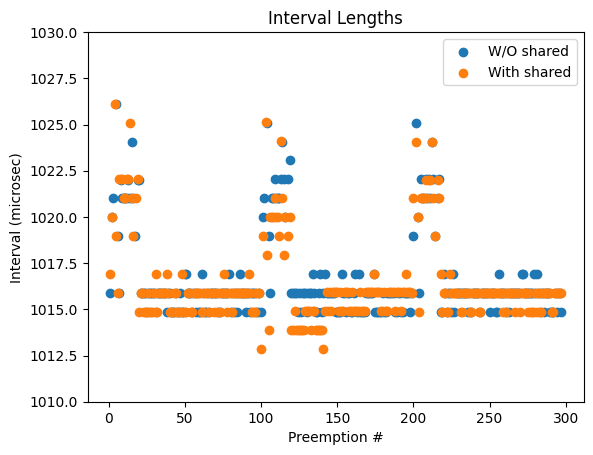

In [15]:
# Plot all intervals
plt.scatter(range(1, NUM_SAMPLES*3-2), all_ivls, label='W/O shared')
plt.scatter(range(1, NUM_SAMPLES*3-2), all_ivls_shared, label='With shared')

# Add labels and title
plt.xlabel('Preemption #')
plt.ylabel('Interval (microsec)')
plt.title('Interval Lengths')

# Add legend
plt.legend()

# Set y-axis limits
plt.ylim(1.01*1e3, 1.03*1e3)

# Show the plot
plt.show()